In [142]:
import numpy as np
import matplotlib.pyplot as plt

rangos_optimos = {
'REACTOR 1': (218, 225),
'REACTOR 2': (315, 320),
'REACTOR 3': (185, 190),
'REACTOR 4': (243, 250)
}

reactores = ['REACTOR 1', 'REACTOR 2', 'REACTOR 3', 'REACTOR 4']
horas = ['08:00', '09:00', '10:00', '11:00', '12:00', '13:00', '14:00', '15:00']

temperaturas = np.array([
[220, 315, 185, 245],
[222, 318, 188, 243],
[225, 320, 186, 248],
[219, 322, 190, 246],
[223, 317, 187, 250],
[221, 325, 189, 244],
[224, 319, 191, 247],
[218, 316, 184, 249]
])

Tareas de Análisis
NIVEL 1: Estadísticas Básicas (5 min)
1. Calcular temperatura promedio, máxima y mínima de cada reactor
2. Calcular la desviación estándar de cada reactor
3. Identificar qué reactor tiene la mayor variabilidad térmica
4. Calcular el rango térmico (max - min) de cada reactor

In [143]:
#1.1 maxs, mins, y avg
promedios = temperaturas.mean(axis=0)
minimos = temperaturas.min(axis = 0)
maximos = temperaturas.max(axis = 0)
for i in range(len(reactores)):
    print(reactores[i],'| T minima:', minimos[i], '| T promedio:', promedios[i], '| T maxima:', maximos[i])


REACTOR 1 | T minima: 218 | T promedio: 221.5 | T maxima: 225
REACTOR 2 | T minima: 315 | T promedio: 319.0 | T maxima: 325
REACTOR 3 | T minima: 184 | T promedio: 187.5 | T maxima: 191
REACTOR 4 | T minima: 243 | T promedio: 246.5 | T maxima: 250


In [144]:
#1.2 std devs
desvios = temperaturas.std(axis=0)
for i in range(len(reactores)):
    print(reactores[i],'| Std Dev:', desvios[i])

REACTOR 1 | Std Dev: 2.29128784747792
REACTOR 2 | Std Dev: 3.082207001484488
REACTOR 3 | Std Dev: 2.29128784747792
REACTOR 4 | Std Dev: 2.29128784747792


In [145]:
#1.3 variabilidad (entendemos como varianza)
varianzas = temperaturas.var(axis=0)
for i in range(len(reactores)):
    print(reactores[i],'| Varianza:', varianzas[i])
#el reactor 2 tiene la mayor varianza termica

REACTOR 1 | Varianza: 5.25
REACTOR 2 | Varianza: 9.5
REACTOR 3 | Varianza: 5.25
REACTOR 4 | Varianza: 5.25


In [146]:
#1.4
for i in range(len(reactores)):
    print(reactores[i],' | Rango de temperaturas:',  maximos[i] - minimos[i],  )

REACTOR 1  | Rango de temperaturas: 7
REACTOR 2  | Rango de temperaturas: 10
REACTOR 3  | Rango de temperaturas: 7
REACTOR 4  | Rango de temperaturas: 7


NIVEL 2: Análisis de Conformidad (5 min)

5. Para cada reactor, determinar cuántas horas estuvo dentro del rango óptimo
6. Calcular el porcentaje de conformidad de cada reactor
7. Identificar en qué hora específica cada reactor alcanzó su temperatura máxima
8. Crear una matriz booleana indicando si cada medición está dentro del rango óptimo

In [147]:
#2.5 hs en rango optimo
horas_en_rango_optimo = {}
minimos_permitidos = np.array([r[0] for r in rangos_optimos.values()])
maximos_permitidos = np.array([r[1] for r in rangos_optimos.values()])

for i, reactor in enumerate(reactores):
    mask = (temperaturas[:, i] >= minimos_permitidos[i]) & (temperaturas[:, i] <=maximos_permitidos[i])
    #creamos una mascara que filtra cada columna segun el minimo y el maximo permitido para cada reactor
    horas_en_rango_optimo[reactor] = int(mask.sum())
    #la mascara devuelve un array donde los valores que cumple la condicion son true, y los que no, false
    #sumando los valores (los trues de evaluan como 1) tenemos el total de valores true, es decir, que cumplen la condicion

print(horas_en_rango_optimo)

{'REACTOR 1': 8, 'REACTOR 2': 6, 'REACTOR 3': 6, 'REACTOR 4': 8}


In [148]:
#2.6 porcentaje de conformidad (% de horas dentro del rango optimo)
print(temperaturas.shape) #sabemos que hay 8 horas en total
for reactor in reactores:
    hs_conformes = horas_en_rango_optimo[reactor]
    print(reactor, '| porcentaje de conformidad: ', 100*hs_conformes / 8, '%')

(8, 4)
REACTOR 1 | porcentaje de conformidad:  100.0 %
REACTOR 2 | porcentaje de conformidad:  75.0 %
REACTOR 3 | porcentaje de conformidad:  75.0 %
REACTOR 4 | porcentaje de conformidad:  100.0 %


In [149]:
#2.7 hora de temperatura maxima
horas_maximas = temperaturas.argmax(axis=0)
for i, reactor in enumerate(reactores):
    print(reactor, '| hora de T maxima: ', horas_maximas[i] + 1) #la primera hora tiene indice 0

REACTOR 1 | hora de T maxima:  3
REACTOR 2 | hora de T maxima:  6
REACTOR 3 | hora de T maxima:  7
REACTOR 4 | hora de T maxima:  5


In [150]:
#2.8 matriz boolean de cumplimiento
mask_rangos = (temperaturas >= minimos_permitidos) & (temperaturas <= maximos_permitidos)
print(mask_rangos)  # 1 si está en rango, 0 si no

[[ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]
 [ True False  True  True]
 [ True  True  True  True]
 [ True False  True  True]
 [ True  True False  True]
 [ True  True False  True]]


NIVEL 3: Detección de Anomalías (5 min)

9. Identificar todas las mediciones fuera de especificación (reactor, hora, temperatura)
10. Calcular cuántos grados se desvió cada medición problemática del límite más
cercano
11. Ordenar los reactores por nivel de criticidad (mayor tiempo fuera de especificación)
12. Calcular la temperatura promedio por hora (todas los reactores) para detectar
patrones temporales

In [151]:
#3.9 y 3.10 reporte con anomalias, calculo de desviacion del rango
for i, fila in enumerate(mask_rangos):
    hora = i+1
    for j, reactor in enumerate(reactores):
        if fila[j] == False:
            t = temperaturas[i][j]
            print('Anomalia detectada en el', reactor, ' a la hora ',hora, ' con temperatura ', t )
            if t > maximos_permitidos[j]:
                print('Desviacion de ', t -maximos_permitidos[j] , ' grados por sobre el maximo')
            else:    
                print('Desviacion de ', minimos_permitidos[j] - t, ' grados por debajo del minimo')            

Anomalia detectada en el REACTOR 2  a la hora  4  con temperatura  322
Desviacion de  2  grados por sobre el maximo
Anomalia detectada en el REACTOR 2  a la hora  6  con temperatura  325
Desviacion de  5  grados por sobre el maximo
Anomalia detectada en el REACTOR 3  a la hora  7  con temperatura  191
Desviacion de  1  grados por sobre el maximo
Anomalia detectada en el REACTOR 3  a la hora  8  con temperatura  184
Desviacion de  1  grados por debajo del minimo


In [152]:
#3.11 conteo y orden por fallas
conteo_fallas = 8 - mask_rangos.sum(axis=0) #hacemos una operacion aritmetica, por eso usamos arrays
indices_ordenados = np.argsort(-conteo_fallas) #no ordena el array, me da el indice de los valores de mayor a menor (por el '-' de adelante)
for i in indices_ordenados:
    print(reactores[i], 'con', conteo_fallas[i], 'fallas')

REACTOR 2 con 2 fallas
REACTOR 3 con 2 fallas
REACTOR 1 con 0 fallas
REACTOR 4 con 0 fallas


In [153]:
#3.12
promedios_por_hora = temperaturas.mean(axis = 1)
for i in range(len(promedios_por_hora)):
    print('Hora', i+1, 'temperatura promedio', promedios_por_hora[i])

Hora 1 temperatura promedio 241.25
Hora 2 temperatura promedio 242.75
Hora 3 temperatura promedio 244.75
Hora 4 temperatura promedio 244.25
Hora 5 temperatura promedio 244.25
Hora 6 temperatura promedio 244.75
Hora 7 temperatura promedio 245.25
Hora 8 temperatura promedio 241.75


NIVEL 4: Visualización (5 min)
13. Crear DOS gráficos:
- Gráfico 1: Gráfico de líneas mostrando la evolución de temperatura de los 4
reactores + bandas de rangos óptimos
- Gráfico 2: Gráfico de barras mostrando el porcentaje de conformidad de cada
reactor

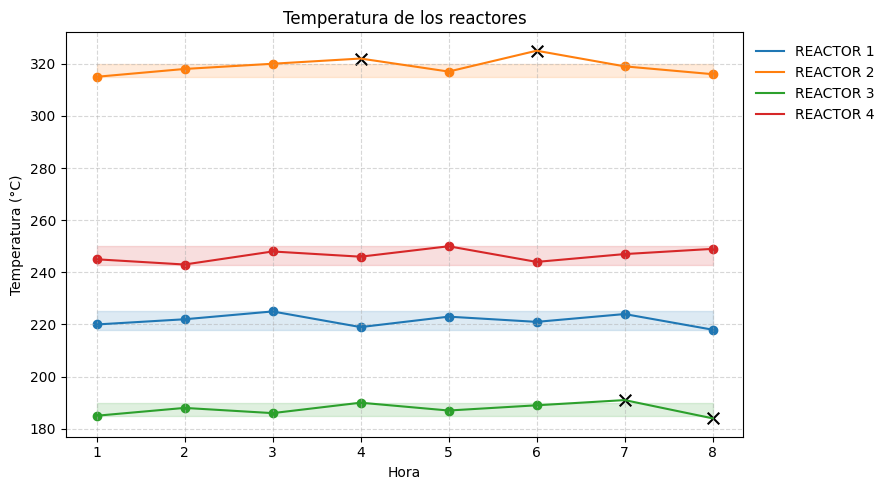

In [171]:
horas = np.array([1,2,3,4,5,6,7,8])

plt.figure(figsize=(9,5))  
 
for i, reactor in enumerate(reactores):
    t = temperaturas[:, i]
    minv, maxv = minimos_permitidos[i], maximos_permitidos[i]
    plt.plot(horas, t, color=f"C{i}", label=reactor)
    
    plt.fill_between(horas, minv, maxv, color=f"C{i}", alpha=0.15)
    
    mask_en_rango = (t >= minv) & (t <= maxv)
    mask_fuera = ~mask_en_rango
    
    plt.scatter(horas[mask_en_rango], t[mask_en_rango], color=f"C{i}", marker='o')
    
    plt.scatter(horas[mask_fuera], t[mask_fuera], color='black', s=70, marker='x')

plt.title("Temperatura de los reactores")
plt.xlabel("Hora")
plt.ylabel("Temperatura (°C)")
plt.legend(
    loc='upper left',          
    bbox_to_anchor=(1, 1),     
    frameon=False              
)
plt.tight_layout()   
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

C:\Users\arira\AppData\Local\Temp\ipykernel_5788\206607878.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(


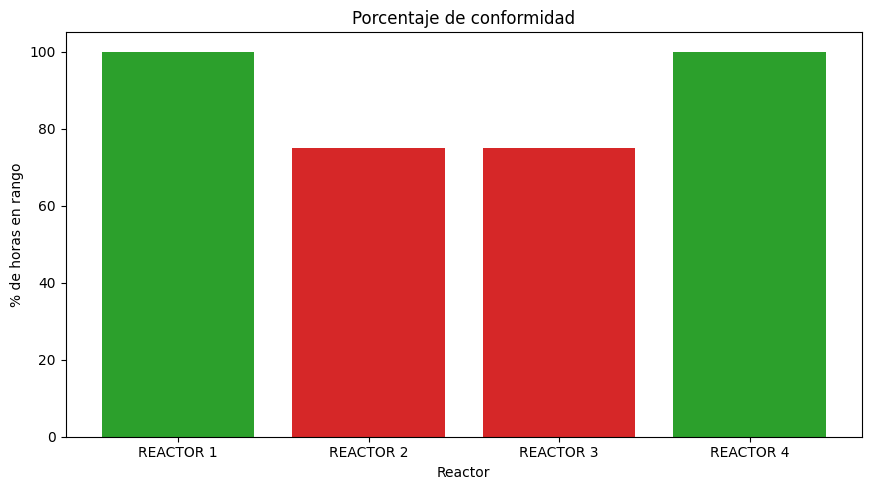

In [158]:
porcentajes_conformidad = 100*(8-conteo_fallas) / 8 

plt.figure(figsize=(9,5))  
colores = ['tab:green' if n == 100 else 'tab:red' for n in porcentajes_conformidad]
plt.bar(reactores, porcentajes_conformidad, color = colores)
plt.title("Porcentaje de conformidad")
plt.xlabel("Reactor")
plt.ylabel("% de horas en rango")
plt.legend(
    loc='upper left',          
    bbox_to_anchor=(1, 1),     
    frameon=False              
)
plt.tight_layout()   
plt.show()

Preguntas para la Presentación (5 min)<br>
-¿Qué reactor necesita intervención inmediata y por qué?<br>
El reactor 2 es el mas necesitado de intervencio; presenta el mayor rango de desviacion termica, y se encuentra empatada por el mayor numero de fallas. Le sigue el reactor 3, tambien con dos fallas, pero con menos varianza/desviacion


-¿La desviación estándar baja siempre indica un buen proceso? Expliquen. <br>
La desviacion estandar es una medida de la dispersion de los datos (la raiz cuadrada de la varianza), lo que puede ser bueno o malo segun el proceso. En nuestro caso, queremos que la temperatura se mantenga lo mas estable posible, por lo que buscamos minima dispersion (baja desviacion). En ejemplos de la industra, donde se busca que los procesos sean estables, este es el resultado que buscamos. Aun asi, es posible imaginarse otros escenarios en los que quisieramos mucha variedad, sobre todo al querer representar aspectos de la realidad, como por ejemplo, al entrevistar personas. Si la distribucion de las edades tuviera una baja desviacion estandar, su variabilidad seria muy reducida, y tambien lo sera su diversidad y representatividad, impactando negativamente en la fiabilidad de la medida. En estos casos, una baja desviacion indicaria un sesgo en las medidas. Dependiendo de las caracterisiticas de nuestro proceso (si queremos que sea estable, aleatorio, diverso, etc) buscaremos maximizar o minimizar la desviacion estandar.

-¿Observaron algún patrón temporal en las temperaturas?<br>
Al observa cada reactor por separado, se ven fluctuaciones aleatorias que no parecen tener ningun indicio (mas o menos estables segun la varianza de cada reactor). Al ver la serie con el promedio de todos los reactores, sin embargo, vemos un aumento progresivo a lo largo del experimento, con una caida abrupta al final. 


-¿Qué métodos de indexing/masking de NumPy utilizaron?<br>
Usamos los metodos estandar para trabajar con arrays (min, max, std, var, mean). Tambien creamos masks binarias para extraer los datos que cumple cierta condicion, y usamos argsort para, en lugar de ordenar el array, acceder a sus indices ordenas (y asi poder acceder a mas de un array al mismo tiempo)